In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation  # 动图的核心函数

In [2]:
## catplot()
## In the examples, we focused on cases where the main relationship was between two numerical variables.
## 更关注两个变量间的关系
## If one of the main variables is “categorical” (divided into discrete groups) 
## it may be helpful to use a more specialized approach to visualization.
## 如果其中一个主要变量是“分类的”(划分为离散的组)，那么使用更专业的方法进行可视化可能会有所帮助。

In [3]:
sns.set(style="ticks", color_codes=True)

In [4]:
## Categorical scatterplots
## 类别散点图
## catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, 
## estimator=<function mean at 0x7fd8ec9e8f28>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, 
## row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, 
## legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

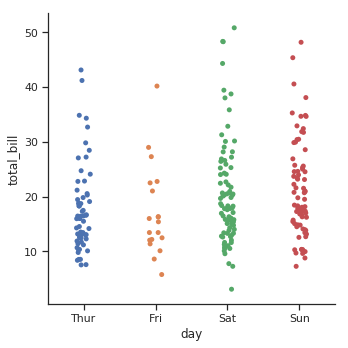

In [5]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

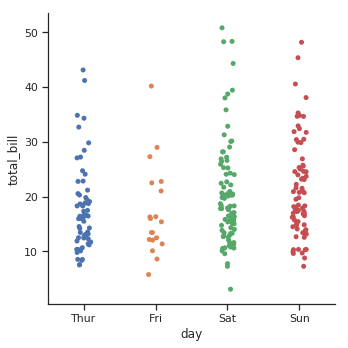

In [14]:
## The jitter parameter controls the magnitude of jitter or disables it altogether
## jitter 控制数据的离散度
## kind = "swarm" 表示数据离散度
sns.catplot(x="day", y="total_bill", jitter=0.1, data=tips);

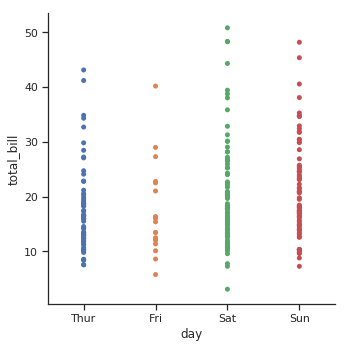

In [17]:
# jitter=False 关闭同类数据的离散度
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

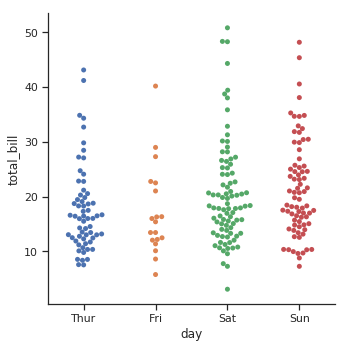

In [19]:
## kind="swarm" 蜂群离散度
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

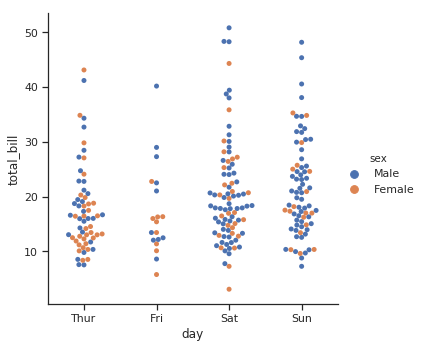

In [20]:
## 蜂群离散度中以hue色彩区分
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

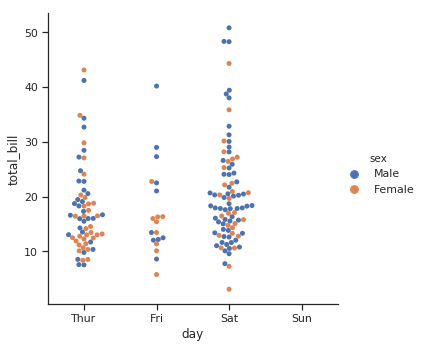

In [29]:
## 选取所需数据制图
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips[tips["day"] != "Sun"])

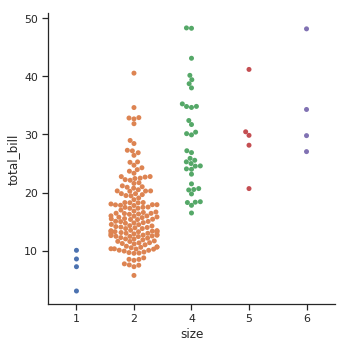

In [21]:
## pandas的query查询数据
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

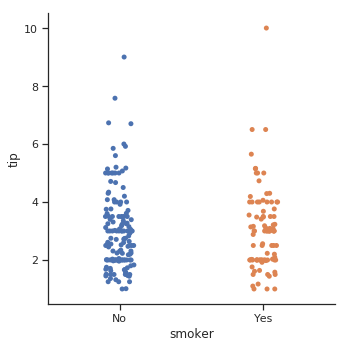

In [30]:
## 对所显示数据定顺序
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

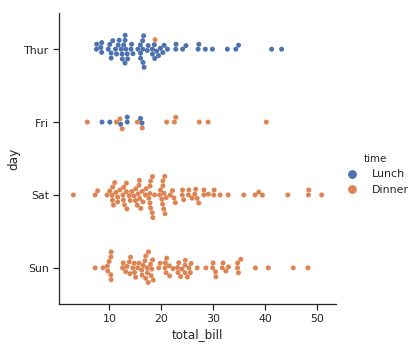

In [60]:
# 调hue参数，通过颜色区分时间维度上的类别
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);
# sns.catplot(x="total_bill", y="day",  kind="swarm", data=tips);

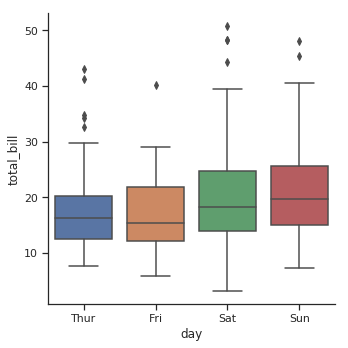

In [32]:
## 箱线图
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

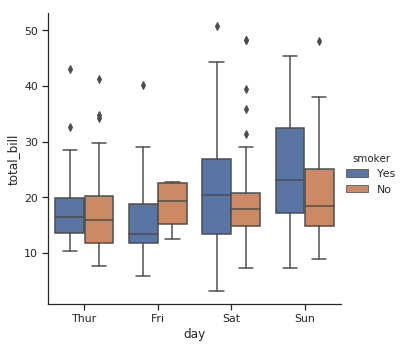

In [33]:
## 箱线图中通过hue使用颜色区别是否抽烟
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

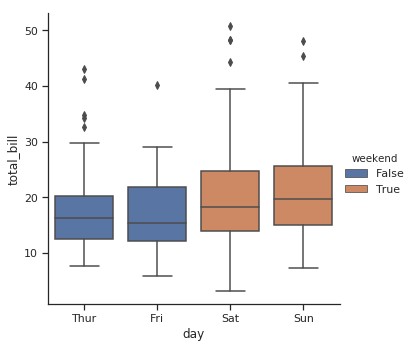

In [62]:
## dodge=False 用于区分是否需要拉伸显示数据框
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

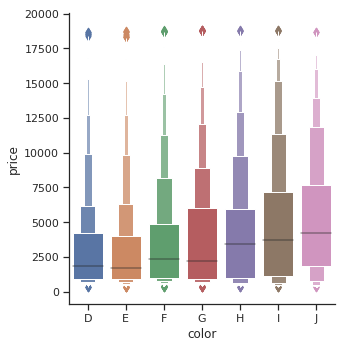

In [35]:
## boxen图 能展示更多关于数据分布形状的信息，它对大数据更加友好
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

In [36]:
## Violinplots
# 小提琴图
## seaborn.violinplot(x=None, y=None, hue=None, 
## data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area',
## scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True,
## orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)¶

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


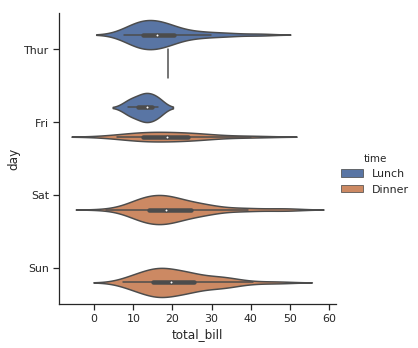

In [37]:
## 用hue 颜色区分不同时间每天的总账单
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


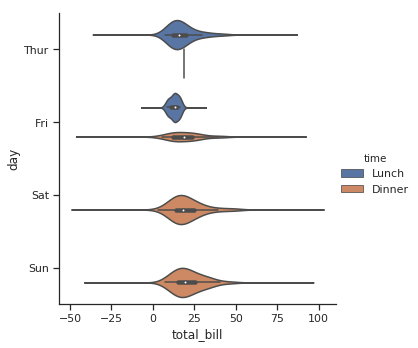

In [70]:
## "bw" Either the name of a reference rule or the scale factor
## to use when computing the kernel bandwidth. The actual kernel size will be determined by multiplying 
## the scale factor by the standard deviation of the data within each bin.
## "cut"
## Distance, in units of bandwidth size, to extend the density past the extreme datapoints. Set to 0 to
## limit the violin range within the range of the observed data
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.55, cut=10,
            data=tips);

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


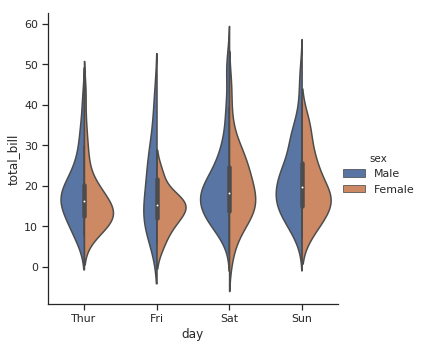

In [39]:
## split，一个小提琴图的大类里的两个小类别，不仅以颜色分，同时做在一张小提琴图里。
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

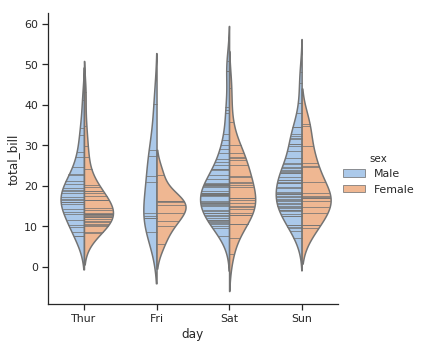

In [74]:
## inner : {“box”, “quartile”, “point”, “stick”, None}, optional
## Representation of the datapoints in the violin interior. If box, draw a miniature boxplot.
## If quartiles, draw the quartiles of the distribution. If point or stick, show each underlying
## datapoint. Using None will draw unadorned violins.
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

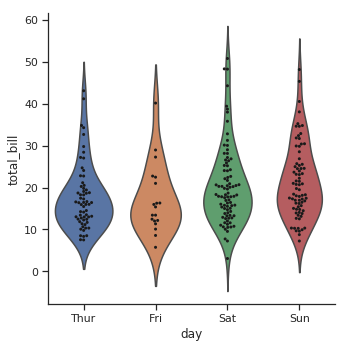

In [76]:
## ax : matplotlib Axes, optional
## Axes object to draw the plot onto, otherwise uses the current Axes.
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

In [42]:
## Statistical estimation within categories
## 类别内统计结果

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


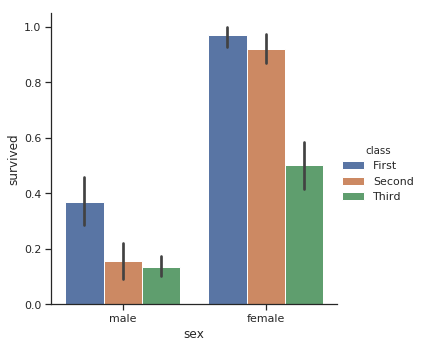

In [43]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

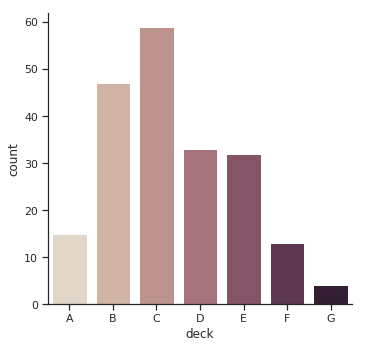

In [44]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

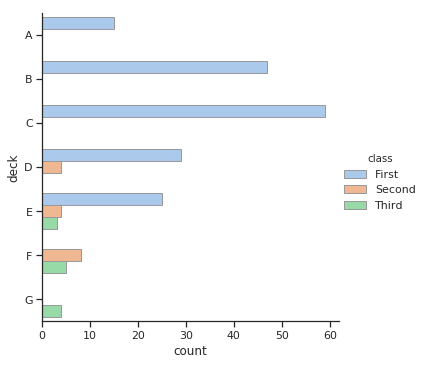

In [45]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

In [46]:
## Point plots

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


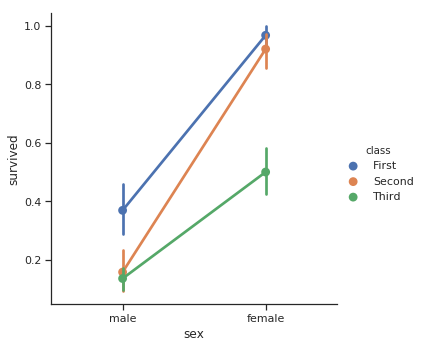

In [47]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


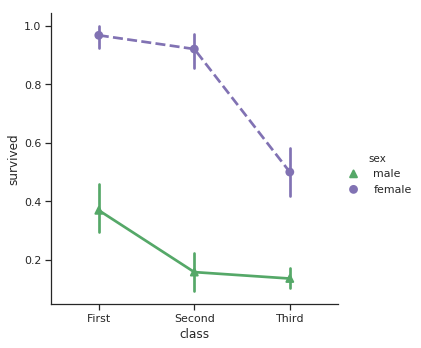

In [48]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

In [49]:
## Plotting “wide-form” data

In [65]:
## Plotting with date data

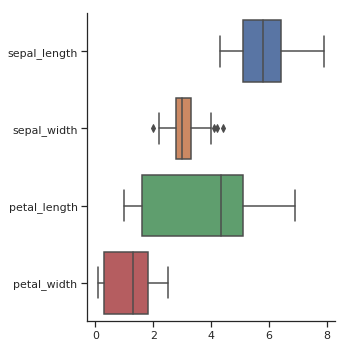

In [50]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box");

/home/mathartsys/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


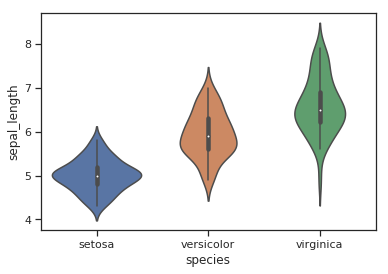

In [51]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

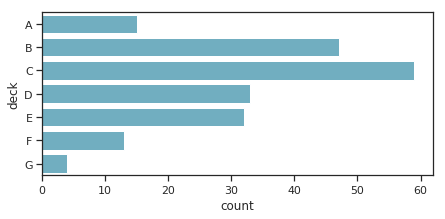

In [52]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

In [53]:
## Showing multiple relationships with facets

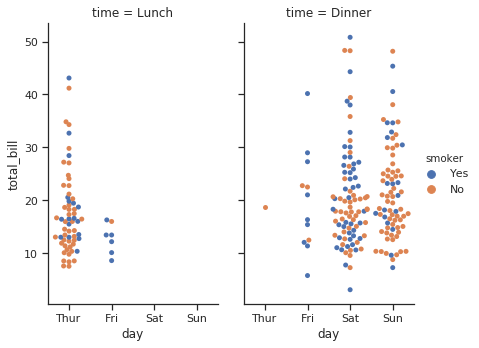

In [54]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

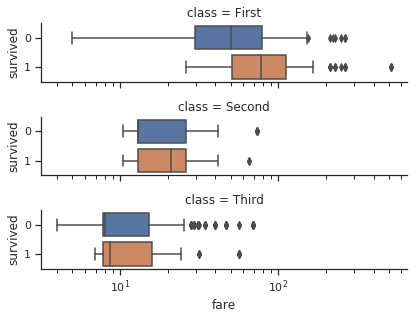

In [55]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");